Desafio realizado por Cristobal Novoa

# Desafío - Árboles de regresión

● Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:

○ El desafío se debe desarrollar de manera Individual.

○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío -
Árboles de regresión,

# Requerimientos

● Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en
la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran
número de atributos.

● Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de
inmuebles, medidos con la variable Sale_Price.

# Ejercicio 1: Preparación del ambiente de trabajo

● Importe las librerías clásicas a utilizar.

● Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la
clase DecisionTreeRegressor.

● De manera adicional importe las funciones y clases necesarias para generar un
desempeño de métricas en problemas de regresión, división de muestras y búsqueda de
grilla con validación cruzada.

● Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
%config IPCompleter.greedy = True

In [2]:
#Importacion de librerias
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score

In [3]:
#Se carga csv
df = pd.read_csv('ames_housing.csv').drop(['Unnamed: 0'], axis=1)
df.shape

(2930, 81)

In [4]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [5]:
#Se reporta si existe valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

No existen valores nulos en el dataframe

# Visualizacion vector objetivo

In [6]:
df['Sale_Price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

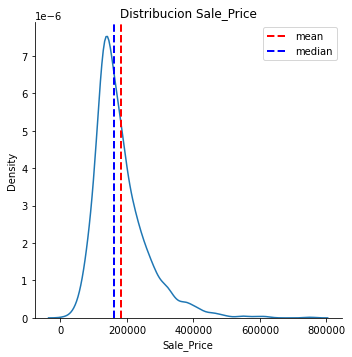

In [7]:
mean_obj= df['Sale_Price'].mean()
median_obj= df['Sale_Price'].median()
sns.displot(data = df['Sale_Price'], kind='kde')
plt.axvline(mean_obj, color = 'Red', linestyle = '--', lw=2, label ='mean')
plt.axvline(median_obj, color = 'blue', linestyle = '--', lw=2, label ='median')
plt.title('Distribucion Sale_Price')
plt.legend()

Sale_Price tiene una distribucion sesgada hacia los valores iniciales.

# Ejercicio 2: Feature engineering

● Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera
'object' o no. Para todas las variables que sean 'object', realice lo siguiente:

○ Genere una recodificación k − 1 en cada variable. Para efectos prácticos sólo
necesitan eliminar una de las categorías, no se concentren en especificar la
categoría a eliminar. Pueden utilizar la función con la opción drop_first para
ello.

○ Utilizando el método pd.concat, concatene a los atributos creados en la base de
datos.

Tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un
aumento artificial del desempeño del modelo.

In [8]:
#Se genera dataframe con datos object y se obtiene lista con esos datos 
df_cat = df.select_dtypes(include = 'object')
cat = df_cat.columns.tolist()

In [9]:
#Se aplica get dummies y se restan las categorias
df_preproc = pd.get_dummies(df, columns = cat, drop_first = True)

In [10]:
#Se muestra el dataframe procesado
df_preproc

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37,7937,1984,1984,0,3,0,184,1003,1003,...,0,0,0,0,1,0,0,0,1,0
2926,0,8885,1983,1983,0,2,324,239,864,902,...,0,0,0,0,1,0,0,0,1,0
2927,62,10441,1992,1992,0,3,0,575,912,970,...,0,0,0,0,1,0,0,0,1,0
2928,77,10010,1974,1975,0,1,123,195,1389,1389,...,0,0,0,0,1,0,0,0,1,0


# Ejercicio 3: Primer modelo

● Genere muestras de entrenamiento y validación con 'Sale_Price' como vector
objetivo y los atributos de la base de datos como matriz.

● Recuerde definir el porcentaje de casos en la muestra de validación y una semilla
pseudoaleatoria.

● Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin
modificar los hiper parámetros. Reporte las principales métricas de desempeño.

● Comente sobre el desempeño.

In [11]:
# Definimos nuestro vector objetivo
y = df_preproc['Sale_Price']
# Definimos nuestra matriz de atributos 
matriz_atrib= df_preproc.drop(['Sale_Price'], axis=1)


In [12]:
# Generamos muestras de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(matriz_atrib, y, test_size=.33, random_state=4982)

In [13]:
dec_tree = DecisionTreeRegressor().fit(X_train, y_train)

In [14]:
print("Test MSE:", mean_squared_error(y_test, dec_tree.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, dec_tree.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree.predict(X_test)).round(5))

Test MSE: 1547236194.66081
Test MAE: 17000.0
Test R2: 0.7582


En base al R2 el modelo presenta un desempeño aceptable, ya que 75% de la variabilidad del vector objetivo es explicado por el modelo de regresión ajustado

# Ejercicio 4: Importancia relativa

● Implemente el método plot_importance utilizado en la lectura para reportar la
importancia relativa de los atributos.

● Comente sobre cuáles son los principales 10 atributos que afectan la predicción de
Sale_Price.

● Separe estos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [15]:
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)


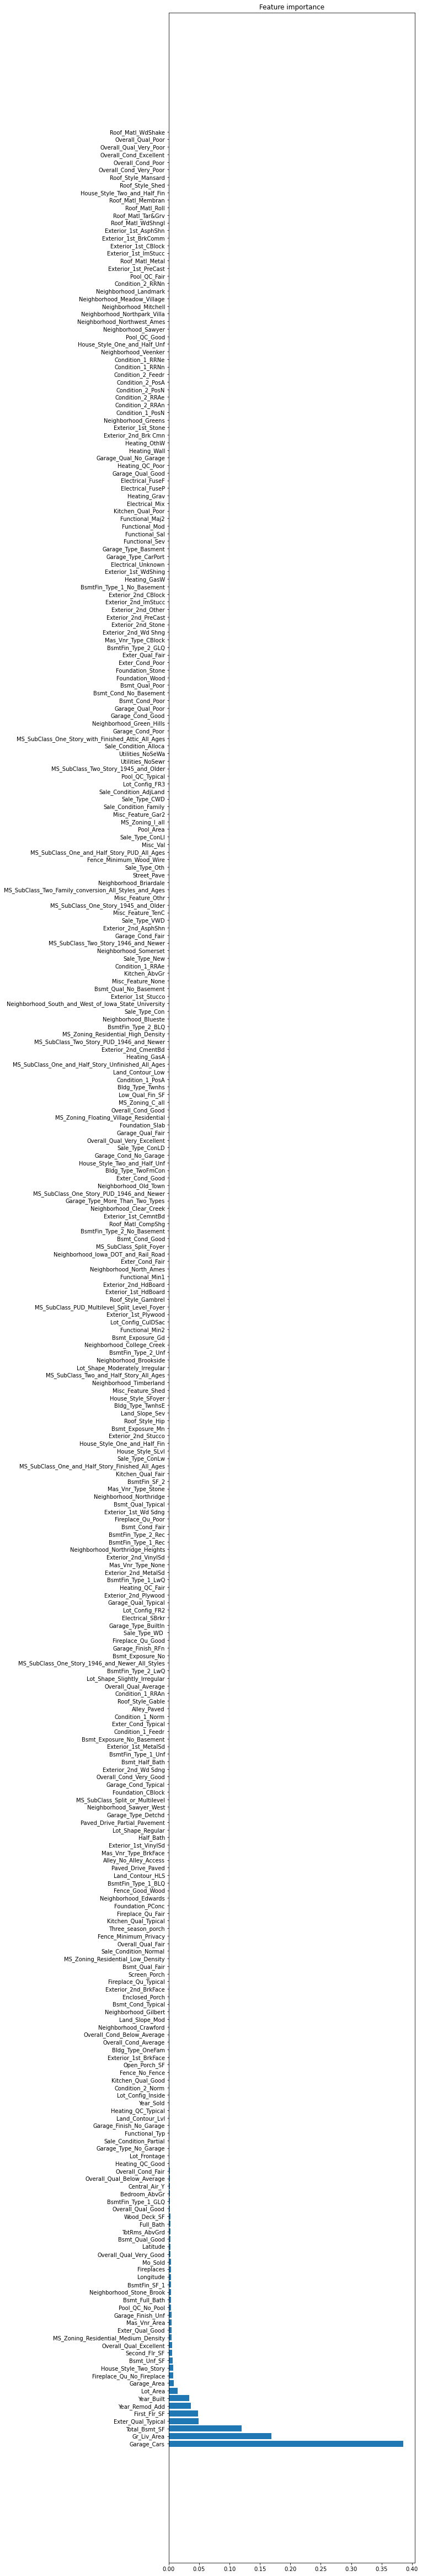

In [16]:
#Se implementa funcion
plt.rcParams['figure.figsize'] = (8, 85)
plot_importance(dec_tree, matriz_atrib.columns)

Los 10 principales atributos son 'Garage_Cars','Gr_Liv_Area','Total_Bsmt_SF','Exter_Qual_Typical',
'First_Flr_SF','Year_Remod_Add','Year_Built','Lot_Area','Open_Porch_SF'y 'Fireplaces'

In [17]:
#Se genera dataframe con atributos principales y vector objetivo
df_best = df_preproc.loc[:,['Garage_Cars','Gr_Liv_Area','Total_Bsmt_SF','Exter_Qual_Typical',
'First_Flr_SF','Year_Remod_Add','Year_Built','Lot_Area','Open_Porch_SF','Fireplaces', 'Sale_Price']]

In [18]:
df_best.head()

,Garage_Cars,Gr_Liv_Area,Total_Bsmt_SF,Exter_Qual_Typical,First_Flr_SF,Year_Remod_Add,Year_Built,Lot_Area,Open_Porch_SF,Fireplaces,Sale_Price
0,2,1656,1080,1,1656,1960,1960,31770,62,2,215000
1,1,896,882,1,896,1961,1961,11622,0,0,105000
2,1,1329,1329,1,1329,1958,1958,14267,36,0,172000
3,2,2110,2110,0,2110,1968,1968,11160,0,2,244000
4,2,1629,928,1,928,1998,1997,13830,34,1,189900


# Ejercicio 5: Refactorización del modelo y picklingpd.get_dummies

● En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar
conjuntos de entrenamiento y validación.

● Dentro de los datos de entrenamiento genere una búsqueda de grilla con GridSearchCV
utilizando los siguientes hiper parámetros:

○ Máximo de atributos: Evalúe todos los posibles atributos.
○ Máximo de profundidad: Entre 1 a 32.
○ Validaciones cruzadas: 5.

● Reporte la mejor combinación de hiper parámetros y su desempeño asociado. Compare
el desempeño en la muestra de validación con el modelo por defecto.

# Pickling

● Ahora generamos una serialización de nuestro modelo depurado, y nuestros conjuntos
de entrenamiento y validación depurados. Para ello importe el módulo pickle.

● pickle contiene la función dump, que permite guardar el modelo desarrollado. La forma
canónica para desarrollar el pickling es:

`pickle.dump(<OBJETO_CON_EL_MODELO>,open('nombre-apellido-actividad07.sav','wb'))` 

● Envíe su modelo y conjuntos de entrenamiento a un compañero

In [19]:
# Definimos nuestro vector objetivo
y_best = df_best['Sale_Price']
# Definimos nuestra matriz de atributos y eliminamos Sale_Price
mat_best= df_best.loc[:,['Garage_Cars','Gr_Liv_Area','Total_Bsmt_SF','Exter_Qual_Typical',
'First_Flr_SF','Year_Remod_Add','Year_Built','Lot_Area','Open_Porch_SF','Fireplaces']]

In [20]:
# Generamos muestras de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(mat_best, y_best, test_size=.33, random_state=4982)

In [21]:
#Se genera gridsearch para buscar hiperparametros
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=4982),
              param_grid={'min_samples_split': range(2, 10),
                          'max_depth': np.linspace(1, 32, 32),
                          'max_features':list(range(1,X_train.shape[1]))},
                          cv=5, refit=True)

In [22]:
#Se entrena el modelo
%time
g_cv.fit(X_train, y_train)

Wall time: 0 ns


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=4982),
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.]),
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': range(2, 10)})

In [23]:
#Se indica mejor combinacion de hiperparametros
g_cv.best_params_

{'max_depth': 7.0, 'max_features': 5, 'min_samples_split': 7}

In [24]:
#Modelo por defecto
dec_tree_default = DecisionTreeRegressor(random_state=4982).fit(X_train, y_train)

In [25]:
print("Test MSE:", mean_squared_error(y_test, dec_tree_default.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, dec_tree_default.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree_default.predict(X_test)).round(5))

Test MSE: 1609029249.0817
Test MAE: 18500.0
Test R2: 0.74854


In [26]:
#Modelo con mejor combinacion de hiperparametros
dec_tree_comb = DecisionTreeRegressor(random_state=4982,max_depth=7, max_features= 5, min_samples_split=7).fit(X_train, y_train)

In [27]:
print("Test MSE:", mean_squared_error(y_test, dec_tree_comb.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, dec_tree_comb.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree_comb.predict(X_test)).round(5))

Test MSE: 1423793003.072
Test MAE: 16126.47059
Test R2: 0.77749


El desempeño del modelo con la mejor combinacion de hiperparametros aumenta el desempeño del modelo, con un mejor R2, MAE y MSE que el modelo por defecto. 

In [39]:
import pickle

In [40]:
#Se generan los objetos para gusardar en formato.sav
pickle.dump(dec_tree_comb,open('cn_dec_tree_best.sav','wb'))
pickle.dump(X_train,open('cn_X_train.sav','wb'))
pickle.dump(X_test,open('cn_X_test.sav','wb'))
pickle.dump(y_train,open('cn_y_train.sav','wb'))
pickle.dump(y_test,open('cn_y_test.sav','wb'))